# Getting started guide

This notebook will help you get started with this project. It takes you through these steps:
    
1. Setting up Google Cloud credentials
2. Preparing your environment
3. Analysing lyrics
4. Visualising data

Let's go.

# 1. Setting up Google Cloud credentials

In this project, you'll use the Google's Natural Language API to transform text into sentiment data. You need to add a valid `credentials.json` file to this project folder to use this API. The steps below explain how to get them.

- Visit https://console.cloud.google.com (and login)
- Create a new project.
- Open `APIs & Services` and enable the `Cloud Natural Language API` (A billing account is required, but you'll only be billed if you use the API many, many times. Which generally does not happen for small projects like this.)
- Move back to `APIs & Services`, select credentials, click `+ Create Credentials`, and select `Service account`.
- Fill out a service account name (leave other fields empty)
- In the list of service account, edit your newly created service account. 
- Open the `KEYS` section, click `ADD KEY`, and `CREATE NEW KEY`.
- Select `JSON` and dowload the generated key to you project folder.
- Change the json filename to `credentials.json`. 

You are now good to go.

# 2: Prepare your environment

Make sure that the environment you are working in has packages from the `requirements.txt` file installed. You can easily do that using this command:

```
pip install -r requirements.txt
```

## 3: Analysing lyrics

We're now ready to start using the project code. Make sure to prepare the text files as described in the readme. I've prepared some files in the folder `songs/avicii_tim`.

First we import a module from `analyse.py`. We then read text files from a folder and analyse them.

In [5]:
from analyse import analyse_files_and_store_in_csv

path_to_txt_files = 'songs/avicii_tim'

output_csv_file_name = 'avicii tim'
analyse_files_and_store_in_csv(path_to_txt_files, output_csv_file_name)

1-tim-peace of mind.txt
10-tim-heart upon my sleeve.txt
11-tim-never leave me.txt
12-tim-fades away.txt
2-tim-heaven.txt
3-tim-sos.txt
4-tim-tough love.txt
5-tim-bad reputation.txt
6-tim-aint a thing.txt
7-tim-hold the line.txt
8-tim-freak.txt
9-tim-excuse me mr sir.txt


To check if the data is here, we load the created `csv` data in dataframe using pandas. Keep in mind that analysed data is stored in the output folder.

In [7]:
import pandas as pd

pd.read_csv(f'output/{output_csv_file_name}.csv')

,title,index,album,score,magnitude
0,peace of mind,1,tim,-0.2,5.6
1,heart upon my sleeve,10,tim,-0.1,5.2
2,never leave me,11,tim,0.6,4.9
3,fades away,12,tim,0.0,2.2
4,heaven,2,tim,0.4,4.7
5,sos,3,tim,0.5,6.9
6,tough love,4,tim,0.2,3.5
7,bad reputation,5,tim,-0.4,6.0
8,aint a thing,6,tim,-0.3,5.2
9,hold the line,7,tim,-0.1,2.8


Bingo, we are good to go.

## 4: Visualising data

Now we get to the fun part. I've included various examples of data visualisations below. They all use the `VisualiseSentiment` class, which is based on Matplotlib. For more visualization ideas, read the readme of the project.

But first, we need to store the csv data in a dataframe.

In [40]:
df = pd.read_csv(f'output/{output_csv_file_name}.csv')
df.head(3)

,title,index,album,score,magnitude
0,peace of mind,1,tim,-0.2,5.6
1,heart upon my sleeve,10,tim,-0.1,5.2
2,never leave me,11,tim,0.6,4.9


#### 4.0 Initialize class

In [41]:
from visualise_sentiment import VisualiseSentiment

viz_buddy = VisualiseSentiment(
    dataframe=df,
    show_grid=True,
    annotate='index',
)

**On saving plots:** if you want to save a plot, enable the line `viz_buddy.save = ...`. To change the output format from png to svg, simply change it at the end of the file name. To disable saving, reset the save value (`viz_buddy = ''`). 

#### 4.1 Basic scatter plot

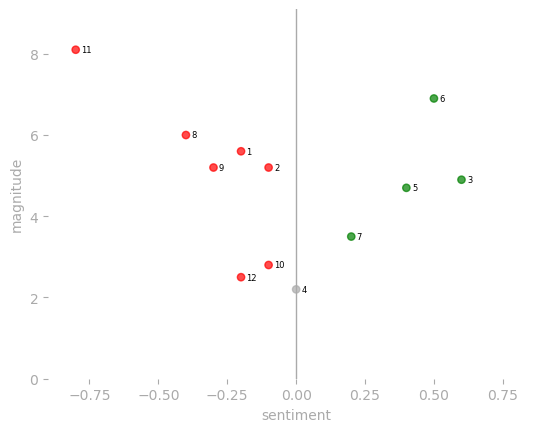

In [57]:
# viz_buddy.save = "plot___scatterplot.png"
viz_buddy.save = ""

viz_buddy.annotate = 'index'
viz_buddy.show_grid = True

viz_buddy.set_scatter_options(
    dot_color="sentiment",
    dot_fill=True,
    dot_amplifier=0
)
viz_buddy.scatter_plot()

#### 4.2 Minimal scatter plot with various dot sizes

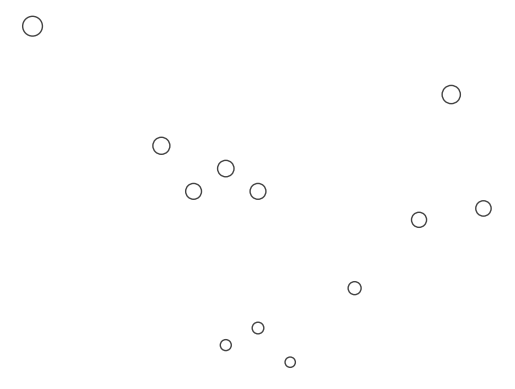

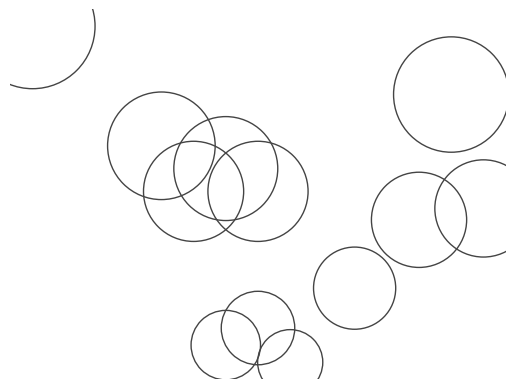

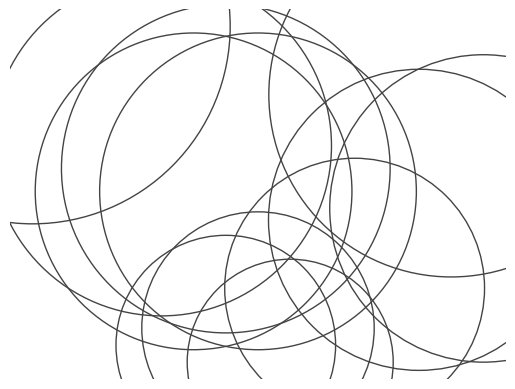

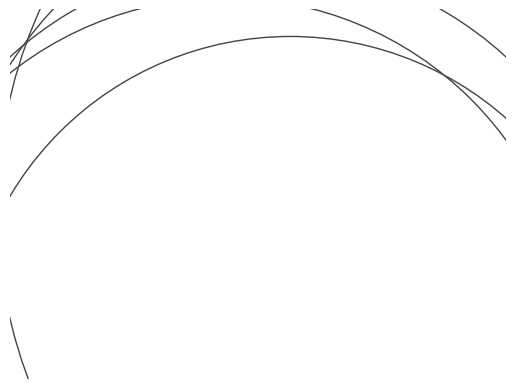

In [58]:
viz_buddy.annotate = False
viz_buddy.show_grid = False
for size in [25, 1000, 10000, 100000]:
#     viz_buddy.save = f"plot___dot-size-{str(size)}.png"
    viz_buddy.set_scatter_options(
        dot_color='#444444',
        dot_fill=False,
        dot_amplifier=size,
    )
    viz_buddy.scatter_plot()

#### 4.3 Path plot explainer

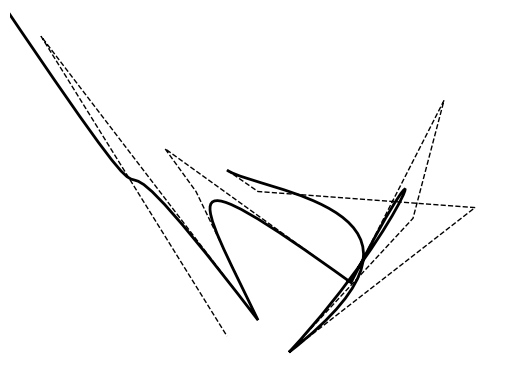

In [59]:
viz_buddy.annotate = 'index'
# viz_buddy.save = f"plot___path-explained.png"
viz_buddy.set_path_options(
    colors=['#000000', '#000000', ],
    styles=['--', '-',],
    widths=[1,2,],
    types=['', 'bezier'],
)
viz_buddy.path_plot()

#### 4.4 Path plot single line

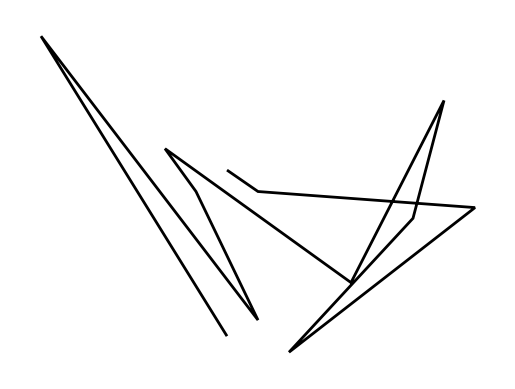

In [60]:
viz_buddy.annotate = False
viz_buddy.show_grid = False
# viz_buddy.save = f"plot___path-straight.png"
viz_buddy.set_path_options(
    colors=['#000000'],
    styles=['-'],
    widths=[2],
    types=[''],
    dot_colours='none',
)
viz_buddy.path_plot()

#### 4.5 Path plot single line closed

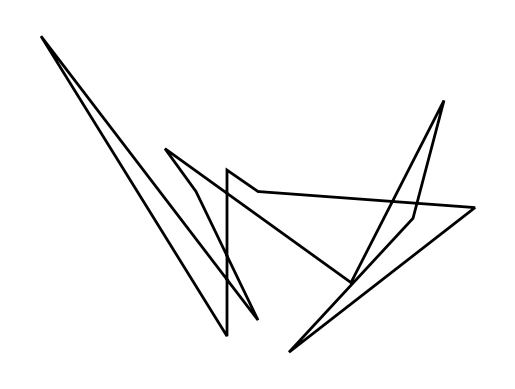

In [61]:
# viz_buddy.save = f"plot___path-straight-closed.png"
viz_buddy.set_path_options(
    colors=['#000000'],
    styles=['-'],
    widths=[2],
    types=[''],
    dot_colours='none',
    close=True,
)
viz_buddy.path_plot()

#### 4.6 Path plot curved bezier

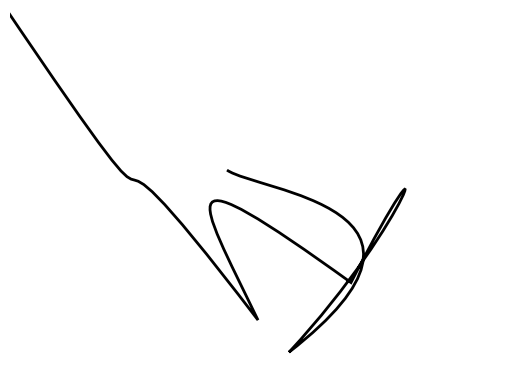

In [62]:
# viz_buddy.save = f"plot___path-curved-bezier.png"
viz_buddy.set_path_options(
    colors=['#000000'],
    styles=['-'],
    widths=[2],
    types=['bezier'],
    dot_colours='none',
    close=False,
)
viz_buddy.path_plot()

#### 4.7 Web plot

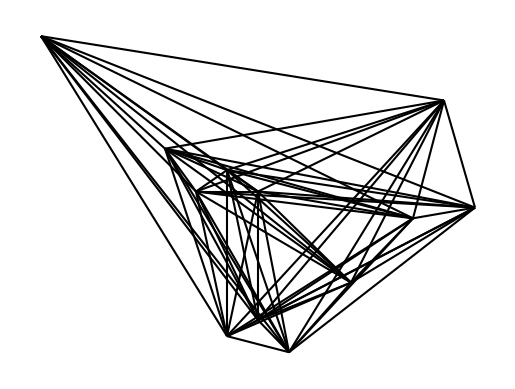

In [63]:
# viz_buddy.save = f"plot___path-web.png"
viz_buddy.set_path_options(
    colors=['#000000'],
    styles=['-'],
    widths=[1],
    types=[''],
    dot_colours='none',
)

viz_buddy.web_plot()

Or change the width of the lines based on the `magnitude` or `score` values.

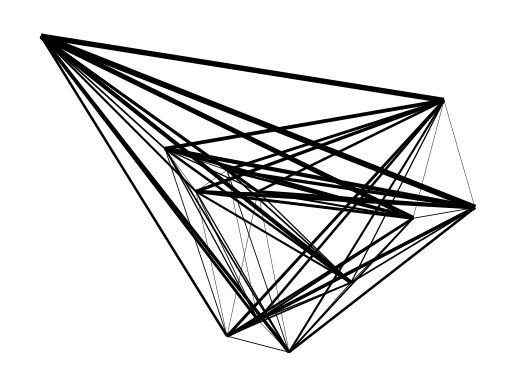

In [64]:
# viz_buddy.save = f"plot___path-web-score.png"
viz_buddy.web_plot(line_width_value='score')